In [1]:
# import all libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
# import the dataset
df = pd.read_csv('/workspaces/Admission_Prediction/Admission_Predict.csv')

In [3]:
# see top 5 rows/records
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
# get total records/rows and columns
df.shape

(400, 9)

In [5]:
# data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [6]:
# EDA Descriptive Statistics

# Mean
print('Mean : ', df.mean())

Mean :  Serial No.           200.500000
GRE Score            316.807500
TOEFL Score          107.410000
University Rating      3.087500
SOP                    3.400000
LOR                    3.452500
CGPA                   8.598925
Research               0.547500
Chance of Admit        0.724350
dtype: float64


In [7]:
# Mode
print('Mode : ', df['GRE Score'].mode())

Mode :  0    312
1    324
Name: GRE Score, dtype: int64


In [8]:
# median
print('Median : ', df.median())

Median :  Serial No.           200.50
GRE Score            317.00
TOEFL Score          107.00
University Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.61
Research               1.00
Chance of Admit        0.73
dtype: float64


In [9]:
# Percentiles 25, 50, 75
print('Percentiles  {25, 50, 75} : ', df.quantile([0.25, 0.5, 0.75]))

Percentiles  {25, 50, 75} :        Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   \
0.25      100.75      308.0        103.0                2.0  2.5   3.0   
0.50      200.50      317.0        107.0                3.0  3.5   3.5   
0.75      300.25      325.0        112.0                4.0  4.0   4.0   

        CGPA  Research  Chance of Admit   
0.25  8.1700       0.0              0.64  
0.50  8.6100       1.0              0.73  
0.75  9.0625       1.0              0.83  


Mean :  316.8075 
Mode :  312 
Median :  317.0


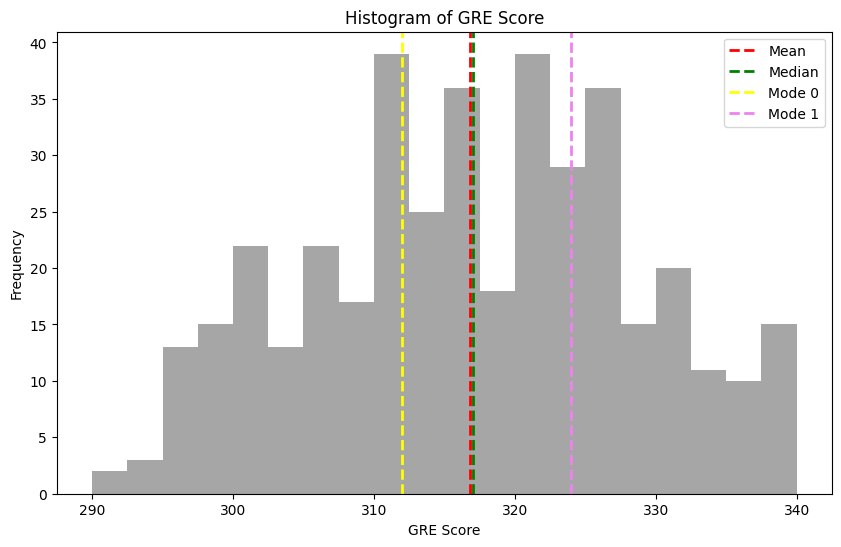

In [10]:
# Plotting summary statistics using histogram

mean = df['GRE Score'].mean()
mode= df['GRE Score'].mode()
median = df['GRE Score'].median()

print('Mean : ', mean, '\nMode : ', mode[0], '\nMedian : ', median)

plt.figure(figsize=(10, 6)) #set figure size
plt.hist(df['GRE Score'], bins=20, color='grey', alpha=0.7) #plot histogram
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2) #plot mean
plt.axvline(median, color='green', linestyle='dashed', linewidth=2) #plot median
plt.axvline(mode[0], color='yellow', linestyle='dashed', linewidth=2) #plot mode  0
plt.axvline(mode[1], color='violet', linestyle='dashed', linewidth=2) #plot mode 1   

plt.title('Histogram of GRE Score') #set title
plt.xlabel('GRE Score') #set x-axis label
plt.ylabel('Frequency') #set y-axis label
plt.legend({'Mean': mean, 'Median': median, 'Mode 0': mode[0], 'Mode 1': mode[1]}) #set legend
plt.show() #show plot

In [11]:
# describe the data
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [12]:
# INTER QUARTILE RANGE (IQR)
IQR = df['GRE Score'].quantile(0.75) - df['GRE Score'].quantile(0.25)
print('IQR : ', IQR)
IQR1 = df['TOEFL Score'].quantile(0.75) - df['TOEFL Score'].quantile(0.25)
print('IQR1 : ', IQR1)

IQR :  17.0
IQR1 :  9.0


In [13]:
# Lets Check IQR of all columns

IQR = df.quantile(0.75) - df.quantile(0.25)
print('IQR : ', IQR)

IQR :  Serial No.           199.5000
GRE Score             17.0000
TOEFL Score            9.0000
University Rating      2.0000
SOP                    1.5000
LOR                    1.0000
CGPA                   0.8925
Research               1.0000
Chance of Admit        0.1900
dtype: float64


In [14]:
# Range : diff b/w  Highest & lowest
dfrange = df.max() - df.min()
print('Range : ', dfrange)

Range :  Serial No.           399.00
GRE Score             50.00
TOEFL Score           28.00
University Rating      4.00
SOP                    4.00
LOR                    4.00
CGPA                   3.12
Research               1.00
Chance of Admit        0.63
dtype: float64


In [15]:
# Variance
print('Variance : ', df.var())

Variance :  Serial No.           13366.666667
GRE Score              131.644555
TOEFL Score             36.838997
University Rating        1.308114
SOP                      1.013784
LOR                      0.807262
CGPA                     0.355594
Research                 0.248365
Chance of Admit          0.020337
dtype: float64


In [16]:
# Standard Deviation
print('Standard Deviation : ', df.std())

Standard Deviation :  Serial No.           115.614301
GRE Score             11.473646
TOEFL Score            6.069514
University Rating      1.143728
SOP                    1.006869
LOR                    0.898478
CGPA                   0.596317
Research               0.498362
Chance of Admit        0.142609
dtype: float64


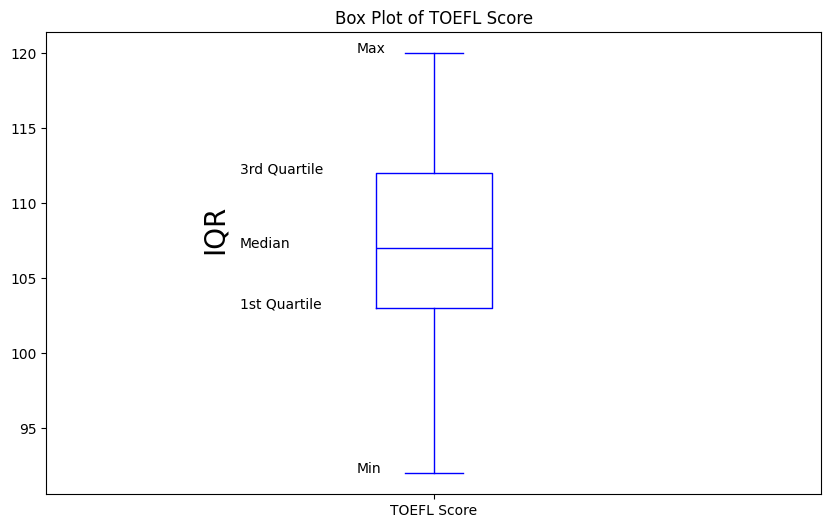

In [17]:
# Creating a box plot of column TOEFL Score
df.boxplot(column='TOEFL Score', grid=False, color='blue',return_type= 'axes', figsize=(10, 6))

# create text for box plot, x axis is adjusted as per text
plt.text(x=.75,y=112,s='3rd Quartile') #add text for 3rd Quartile
plt.text(x=.75,y=107,s='Median') #add text for Median
plt.text(x=.75,y=103,s='1st Quartile') #add text for 1st Quartile
plt.text(x=.9,y=92,s='Min') #add text for Min
plt.text(x=.9,y=120,s='Max') #add text for Max
plt.text(x=.7,y=107,s='IQR',rotation = 90, size='20' ) #add text for IQR


# set title & labels
plt.title('Box Plot of TOEFL Score') #set title
plt.show() #show plot

In [18]:
# In above Plot we can see that there are no outliers in the data. This data is clean and ready for analysis.

# Lests Start with Covarinace and Correlation

#--------------------------------------------------------------------------------------------------------------------------------------------------------

# Covariance : Covariance is a measure of how much two random variables vary together. It is a measure of the relationship between the two variables.
# If the variables tend to increase or decrease together, the covariance is positive. 
# If one variable tends to increase when the other decreases, the covariance is negative.
# If the variables are independent, the covariance is zero.
# Covariance is not a standardized measure, so it is difficult to interpret.
# Correlation : Correlation is a standardized measure of the relationship between two variables.
# It is a measure of how much two random variables vary together, relative to their standard deviations.

In [19]:
df.cov()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,13366.666667,-129.369674,-103.807018,-22.472431,-19.432331,-9.164160,-3.144373,-3.637845,0.698020
GRE Score,-129.369674,131.644555,58.216967,8.778791,7.079699,5.747726,5.699742,3.318690,1.313271
TOEFL Score,-103.807018,58.216967,36.838997,4.828697,4.021053,3.095965,2.998337,1.481729,0.685179
University Rating,-22.472431,8.778791,4.828697,1.308114,0.845865,0.678352,0.509117,0.255232,0.116009
SOP,-19.432331,7.079699,4.021053,0.845865,1.013784,0.660025,0.431183,0.222807,0.097028
LOR,-9.164160,5.747726,3.095965,0.678352,0.660025,0.807262,0.359084,0.177701,0.085834
CGPA,-3.144373,5.699742,2.998337,0.509117,0.431183,0.359084,0.355594,0.155026,0.074265
Research,-3.637845,3.318690,1.481729,0.255232,0.222807,0.177701,0.155026,0.248365,0.039317
Chance of Admit,0.698020,1.313271,0.685179,0.116009,0.097028,0.085834,0.074265,0.039317,0.020337


In [20]:
# Correlation : Correlation is a measure of the strength and direction of the linear relationship between two variables.
# It is a standardized measure, so it is easy to interpret.
# Correlation is a value between -1 and 1.
# If the correlation is 1, it means that the two variables are perfectly positively correlated.
# If the correlation is -1, it means that the two variables are perfectly negatively correlated.
# If the correlation is 0, it means that the two variables are not correlated. 

In [21]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


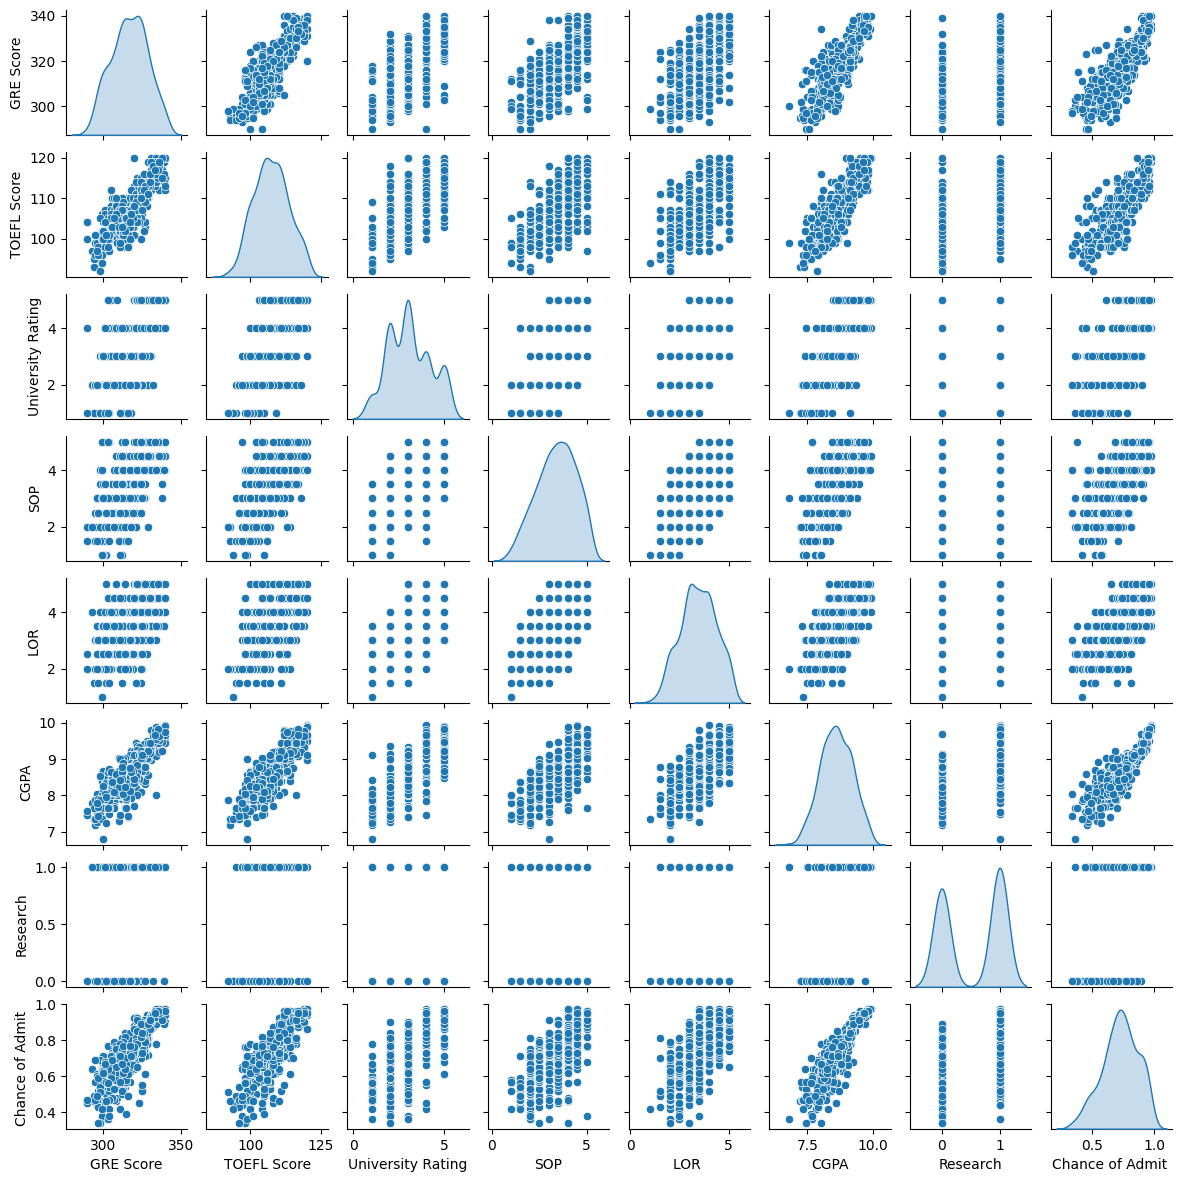

In [33]:
# PairPlot : Pairplot is a matrix of scatter plots that shows the relationship between each pair of variables in the dataset.
sns.pairplot(df, diag_kind='kde', height=1.5)
plt.show() #show plot

In [23]:
# Now analyze above pairplot
# 1. GRE Score and TOEFL Score are positively correlated with each other.
# 2. GRE Score and University Rating are positively correlated with each other.
# 3. GRE Score and Chance of Admit are positively correlated with each other.
# 4. GRE Score and LOR are positively correlated with each other.
# 5. GRE Score and SOP are positively correlated with each other.
# 6. GRE Score and CGPA are positively correlated with each other.
# 7. GRE Score and Research are positively correlated with each other.
# 8. GRE Score and GRE Score are positively correlated with each other.

#-------------------------------------------------------------------------------------------------------------------------------------------------------------
# Notes :
# Factors That Affect Admission Chances :
# 1. GRE Score: A higher GRE score indicates a better performance on the GRE exam, which is an important factor in the admission process.
# 2. TOEFL Score: A higher TOEFL score indicates a better performance on the TOEFL exam, which is an important factor in the admission process.
# 3. CGPA: A higher CGPA indicates a better academic performance, which is an important factor in the admission process.

# These three Columns 'GRE Score', 'TOEFL Score' and 'CGPA' are the most important factors that affect the admission chances.

In [24]:
# you know in our dataset there is a column 'Serial No.' which is not required for analysis, so we will drop this column.
df.drop(['Serial No.'], axis=1, inplace=True)

# Now we will check the dataframe again to see the changes. 
df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


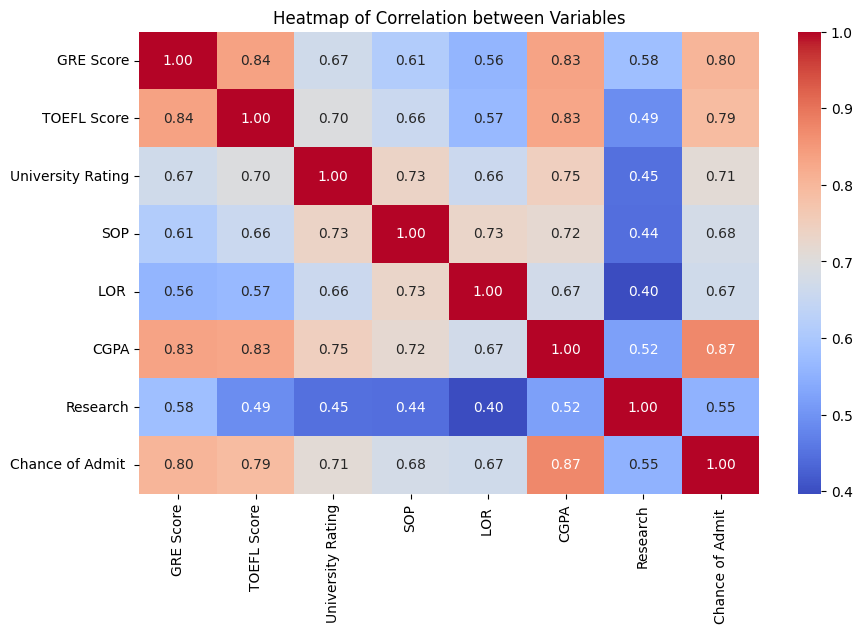

In [25]:
# Heatmap : A heatmap is a graphical representation of data where the individual values are represented as colors.
# Now we will create a heatmap to visualize the correlation between the variables in the dataset.

plt.figure(figsize=(10, 6)) #set figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f') #create heatmap
plt.title('Heatmap of Correlation between Variables') #set title
plt.show() #show plot

In [26]:
# Anlaysis from Heatmap, we obsereve that TOEFL Score are highest positive co-relation with all attribute. 

# Lets talk about Skewness and Kurtosis

#----------------------------------------------------------------------------------------------------------------------------------------------------------

# Skewness : Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.
# A distribution is said to be skewed if it is not symmetric about its mean.
# A positive skew indicates that the tail on the right side of the distribution is longer or fatter than the left side.
# A negative skew indicates that the tail on the left side of the distribution is longer or fatter than the right side.
# A skewness of 0 indicates a symmetric distribution.

#---------------------------------------------------------------------------------------------------------------------------------------------------------

# Kurtosis : Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.
# A distribution with high kurtosis has heavy tails and a sharp peak.
# A distribution with low kurtosis has light tails and a flat peak.
# A kurtosis of 3 indicates a normal distribution.
# A kurtosis of less than 3 indicates a distribution with lighter tails than a normal distribution.
# A kurtosis of greater than 3 indicates a distribution with heavier tails than a normal distribution.



In [27]:
# Skewness 
print('Skewness : ', df.skew())

Skewness :  GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit     -0.353448
dtype: float64


In [28]:
# Kurtosis
print('Kurtosis : ', df.kurtosis())

Kurtosis :  GRE Score           -0.700489
TOEFL Score         -0.578778
University Rating   -0.796287
SOP                 -0.675610
LOR                 -0.662484
CGPA                -0.458476
Research            -1.973187
Chance of Admit     -0.389126
dtype: float64


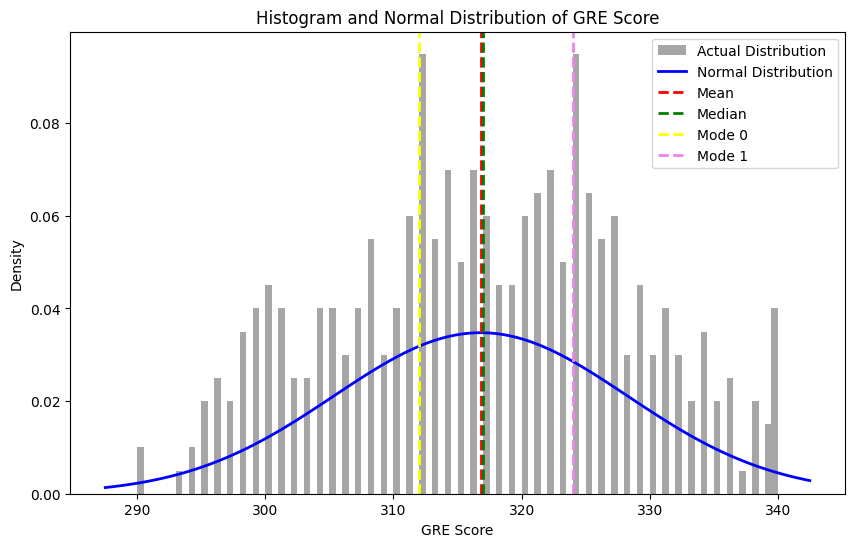

In [32]:
# Histogram for checking skewness 

from scipy.stats import norm

# Plot histogram with normal distribution curve for GRE Score


plt.figure(figsize=(10, 6))
# Histogram
plt.hist(df['GRE Score'], bins=100, color='grey', alpha=0.7, density=True, label='Actual Distribution')

# Normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, df['GRE Score'].std())
plt.plot(x, p, 'b', linewidth=2, label='Normal Distribution')

# Mean, median, mode lines
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(mode[0], color='yellow', linestyle='dashed', linewidth=2, label='Mode 0')
plt.axvline(mode[1], color='violet', linestyle='dashed', linewidth=2, label='Mode 1')

plt.title('Histogram and Normal Distribution of GRE Score')
plt.xlabel('GRE Score')
plt.ylabel('Density')
plt.legend()
plt.show()